<a href="https://colab.research.google.com/github/oluwamark/compx310/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1Y5tly0DhHIIt2XOJIwZgW3gGIUZ9rDOl?usp=sharing

##Part 1


###1A - Importing data, Metadata

In [ ]:
# import math and stats libraries
import pandas as pd

# student id
id = 1631625

# datasets
train_url = "https://raw.githubusercontent.com/bpfa/data_for_compx310_2025/main/covtype_train.csv"
test_url = "https://raw.githubusercontent.com/bpfa/data_for_compx310_2025/main/covtype_test.csv"

# reading the train forest cover and test forest cover datasets
train_fc = pd.read_csv(train_url)
test_fc = pd.read_csv(test_url)

In [ ]:
# display metadata for training dataset
train_fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58102 entries, 0 to 58101
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Elevation                            58102 non-null  float64
 1    Aspect                              58102 non-null  float64
 2    Slope                               58102 non-null  float64
 3    Horizontal_Distance_To_Hydrology    58102 non-null  float64
 4    Vertical_Distance_To_Hydrology      58102 non-null  float64
 5    Horizontal_Distance_To_Roadways     58102 non-null  float64
 6    Hillshade_9am                       58102 non-null  float64
 7    Hillshade_Noon                      58102 non-null  float64
 8    Hillshade_3pm                       58102 non-null  float64
 9    Horizontal_Distance_To_Fire_Points  58102 non-null  float64
 10   Wilderness_Area1                    58102 non-null  int64  
 11   Wilderness_Area2           

In [ ]:
# display metadata for test dataset
test_fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58102 entries, 0 to 58101
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Elevation                            58102 non-null  float64
 1    Aspect                              58102 non-null  float64
 2    Slope                               58102 non-null  float64
 3    Horizontal_Distance_To_Hydrology    58102 non-null  float64
 4    Vertical_Distance_To_Hydrology      58102 non-null  float64
 5    Horizontal_Distance_To_Roadways     58102 non-null  float64
 6    Hillshade_9am                       58102 non-null  float64
 7    Hillshade_Noon                      58102 non-null  float64
 8    Hillshade_3pm                       58102 non-null  float64
 9    Horizontal_Distance_To_Fire_Points  58102 non-null  float64
 10   Wilderness_Area1                    58102 non-null  int64  
 11   Wilderness_Area2           

###1B - Preparing the data

In [ ]:
from sklearn.model_selection import train_test_split

# https://www.w3schools.com/python/pandas/ref_df_drop.asp
# use dropna() to remove rows with NaN values
train_fc = train_fc.dropna()
test_fc = test_fc.dropna()
# making new dataframes for X and y. Removing class column from the features
X_tr = train_fc.drop([' class'], axis=1)
y_tr = train_fc[' class']

X_ts = test_fc.drop([' class'], axis=1)
y_ts = test_fc[' class']

This code block splits the training and test datasets into features and the response variable

###1C - Accuracies at various max_leaf_nodes values

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
# https://visualstudiomagazine.com/articles/2023/03/17/scikit-classification.aspx
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://www.w3schools.com/python/python_dictionaries.asp
# https://www.geeksforgeeks.org/python/python-ways-to-create-a-dictionary-of-lists/

import sklearn.tree as tree
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd

# list of the max_leaf_node values
max_leaf_nodes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

# a dictionary to store accuracy values for each max_leaf_node value
mln_accuracies = {
    2: [],
    4: [],
    8: [],
    16: [],
    32: [],
    64: [],
    128: [],
    256: [],
    512: [],
    1024: [],
    2048: [],
    4096: [],
    8192: [],
    16384: [],
    32768: [],
}

# looping through 0-29
for i in range(30):
    # incrementing the id/seed value
    seed = 1631625+i
    # splitting training data into 80/20 train/test subsets
    # stratifying to ensure equal distribution of class labels in each subset
    X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2, random_state=seed, stratify=y_tr)

    # for each random test_train_split, create a decision tree classifer and test its accuracy for various max_leaf_node values
    for mln in max_leaf_nodes:
      # training the decision tree
      dt = tree.DecisionTreeClassifier(max_leaf_nodes=mln, random_state=1631625)
      dt.fit(X_train, y_train)

      # other method to get model accuracy
      #acc_test = dt.score(X_test, y_test)
      #print("Accuracy on test = %0.4f " % acc_test)

      # make prediction using features from test set (subset of train_fc)
      y_pred = dt.predict(X_test)

      # appending accuracy value to dictionary
      mln_accuracies[mln].append(accuracy_score(y_test, y_pred))

      # display results
      print(f"Test accuracy: {accuracy_score(y_test, y_pred)}\t\t seed={seed}\t mln={mln}")
    print(f"Seed {i} complete \n\n")


Test accuracy: 0.632131486102745		 seed=1631625	 mln=2
Test accuracy: 0.6691334652783754		 seed=1631625	 mln=4
Test accuracy: 0.6778246278289304		 seed=1631625	 mln=8
Test accuracy: 0.6853971258927803		 seed=1631625	 mln=16
Test accuracy: 0.7061354444540057		 seed=1631625	 mln=32
Test accuracy: 0.7241201273556492		 seed=1631625	 mln=64
Test accuracy: 0.7483004904913518		 seed=1631625	 mln=128
Test accuracy: 0.771792444712159		 seed=1631625	 mln=256
Test accuracy: 0.7935633766457275		 seed=1631625	 mln=512
Test accuracy: 0.8223044488426126		 seed=1631625	 mln=1024
Test accuracy: 0.8372773427415885		 seed=1631625	 mln=2048
Test accuracy: 0.8398588761724465		 seed=1631625	 mln=4096
Test accuracy: 0.834179502624559		 seed=1631625	 mln=8192
Test accuracy: 0.834179502624559		 seed=1631625	 mln=16384
Test accuracy: 0.834179502624559		 seed=1631625	 mln=32768
Seed 0 complete 


Test accuracy: 0.6349711728766888		 seed=1631626	 mln=2
Test accuracy: 0.6717149987092332		 seed=1631626	 mln=4
Test 

The output of this codeblock shows the accuracy scores of many decision tree models trained on an 80:20 test-train split of the training data set. The random split seed is varied from 1631625 to 1631654 (a range of 30), and each split is used to train 15 models with varying max_leaf_node values for each model. Note that the random_state seed for train_test_split varies, the seed for the decision tree classifier does not (fixed value 1631625).

##Part 2

<Axes: title={'center': 'Model Accuracy by max_leaf_nodes'}, xlabel='Value of max_leaf_nodes', ylabel='Model accuracy'>

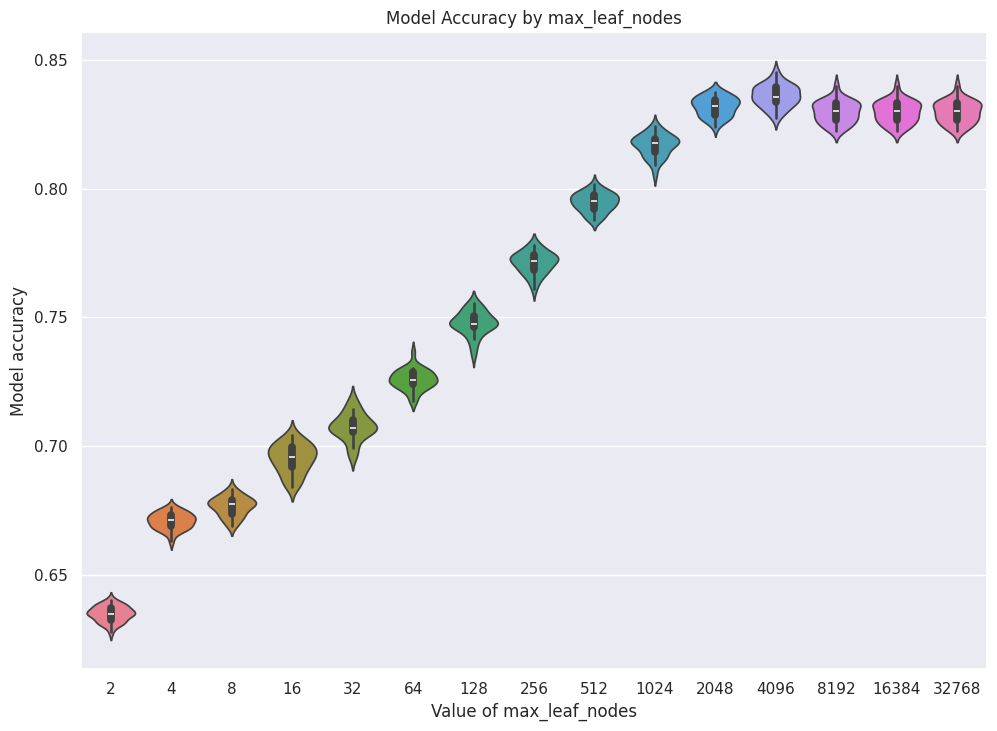

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://www.geeksforgeeks.org/python/violinplot-using-seaborn-in-python/
# https://www.geeksforgeeks.org/python/different-ways-to-create-pandas-dataframe/
# https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/

# creating the violin plot
data = pd.DataFrame(mln_accuracies)

# configure display to be in A4 dimensions
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

# create violin plot, with title and axes labels specified
vplot = sns.violinplot(data)
vplot.set_title("Model Accuracy by max_leaf_nodes")
vplot.set_ylabel("Model accuracy")
vplot.set_xlabel("Value of max_leaf_nodes")

# display violin plot
vplot

The violin plot allows us to compare the distributions of various groups of data. In our case, we are comparing 15 groups of data produced by training decision trees with varying max leaf node values. Each 'violin' comprises a box plot and a density curve. In the above graph, '*Model Accuracy by max_leaf_nodes*', we can see that the model with a max of 4096 leaf nodes produces the best accuracies - around 84%.

The density curves and overlaid boxplots are constructed from the data produced in the '*Accuracies at various max_leaf_nodes values*' section of this notebook which produces 30 accuracy scores for each of the specified max_leaf_node values, using a different test-train split for each score (incrementing the random see id+1 in each for loop iteration).

Values below 4096 may produce models which don't 'ask' enough questions to accuractely classify. Values above 4096 may ask too many questions, in which case the questions are too specific (overfitting) and the model is trying to fit noise.

https://www.atlassian.com/data/charts/violin-plot-complete-guide

##Part 3

In [ ]:
import sklearn.tree as tree
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd

# second dictionary for part 3
mln_accuracies2 = {
    2: [],
    4: [],
    8: [],
    16: [],
    32: [],
    64: [],
    128: [],
    256: [],
    512: [],
    1024: [],
    2048: [],
    4096: [],
    8192: [],
    16384: [],
    32768: [],
}

# loop through each max_leaf_node value and train a decision tree classifier using that value
for mln in max_leaf_nodes:
    # train model on the entirety of the training dataset
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=mln, random_state=id)
    dt.fit(X_tr, y_tr)

    # make prediciton based on features for the entire testing dataset
    y_pred = dt.predict(X_ts)

    # compare the prediction and the true values
    mln_accuracies2[mln].append(accuracy_score(y_ts, y_pred))

    # display results
    print(f"Test accuracy: {accuracy_score(y_ts, y_pred)}\t\t seed={seed}\t mln={mln}")


Test accuracy: 0.6315961584799147		 seed=1631654	 mln=2
Test accuracy: 0.6683763037416957		 seed=1631654	 mln=4
Test accuracy: 0.6753295927851021		 seed=1631654	 mln=8
Test accuracy: 0.6863274930294998		 seed=1631654	 mln=16
Test accuracy: 0.70469174899315		 seed=1631654	 mln=32
Test accuracy: 0.7226257271694606		 seed=1631654	 mln=64
Test accuracy: 0.748442394409831		 seed=1631654	 mln=128
Test accuracy: 0.7697325393273897		 seed=1631654	 mln=256
Test accuracy: 0.7937248287494406		 seed=1631654	 mln=512
Test accuracy: 0.8195759182127982		 seed=1631654	 mln=1024
Test accuracy: 0.840986540910812		 seed=1631654	 mln=2048
Test accuracy: 0.8459605521324567		 seed=1631654	 mln=4096
Test accuracy: 0.8399366631097036		 seed=1631654	 mln=8192
Test accuracy: 0.8399366631097036		 seed=1631654	 mln=16384
Test accuracy: 0.8399366631097036		 seed=1631654	 mln=32768


The above code block displays the accuracy of 15 decision tree models. We are training each model on the entire training dataset, and testing accuracy on the entire testing dataset. mln = 4096 produced the most accurate model ~= 84.6%.

###3A-Test dataset accuracies

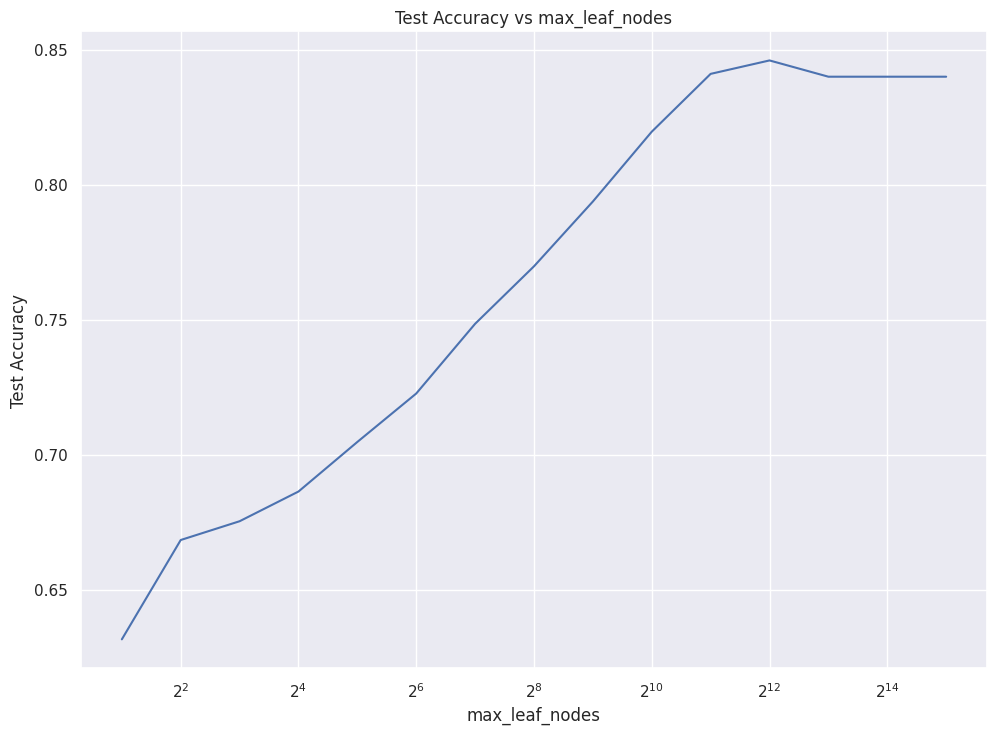

In [ ]:
# https://www.geeksforgeeks.org/python/how-to-plot-logarithmic-axes-in-matplotlib/
# https://stackoverflow.com/questions/8887544/making-square-axes-plot-with-log2-scales-in-matplotlib

# creating the line plot
import matplotlib.pyplot as plt

# extracting values from dictionary
accuracies2 = list(mln_accuracies2.values())

# constructing the graph
# creates a figure and axes for plotting
fig, ax = plt.subplots()
#plots data as a linegraph
ax.plot(max_leaf_nodes, accuracies2)
# sets x axis scale to log_2
ax.set_xscale('log', base=2)
# setting graph title and axes labels
ax.set_xlabel('max_leaf_nodes')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy vs max_leaf_nodes')
#displau plot
plt.show()

The above line plot '*Test accuracy vs max_leaf_nodes*' agrees with an earlier statement, that max_leaf_nodes = 4096 produces the most accurate classifier for this dataset. The line plot has the same general shape as the violin plot produced above, which is encouraging.

###3B-Decision trees

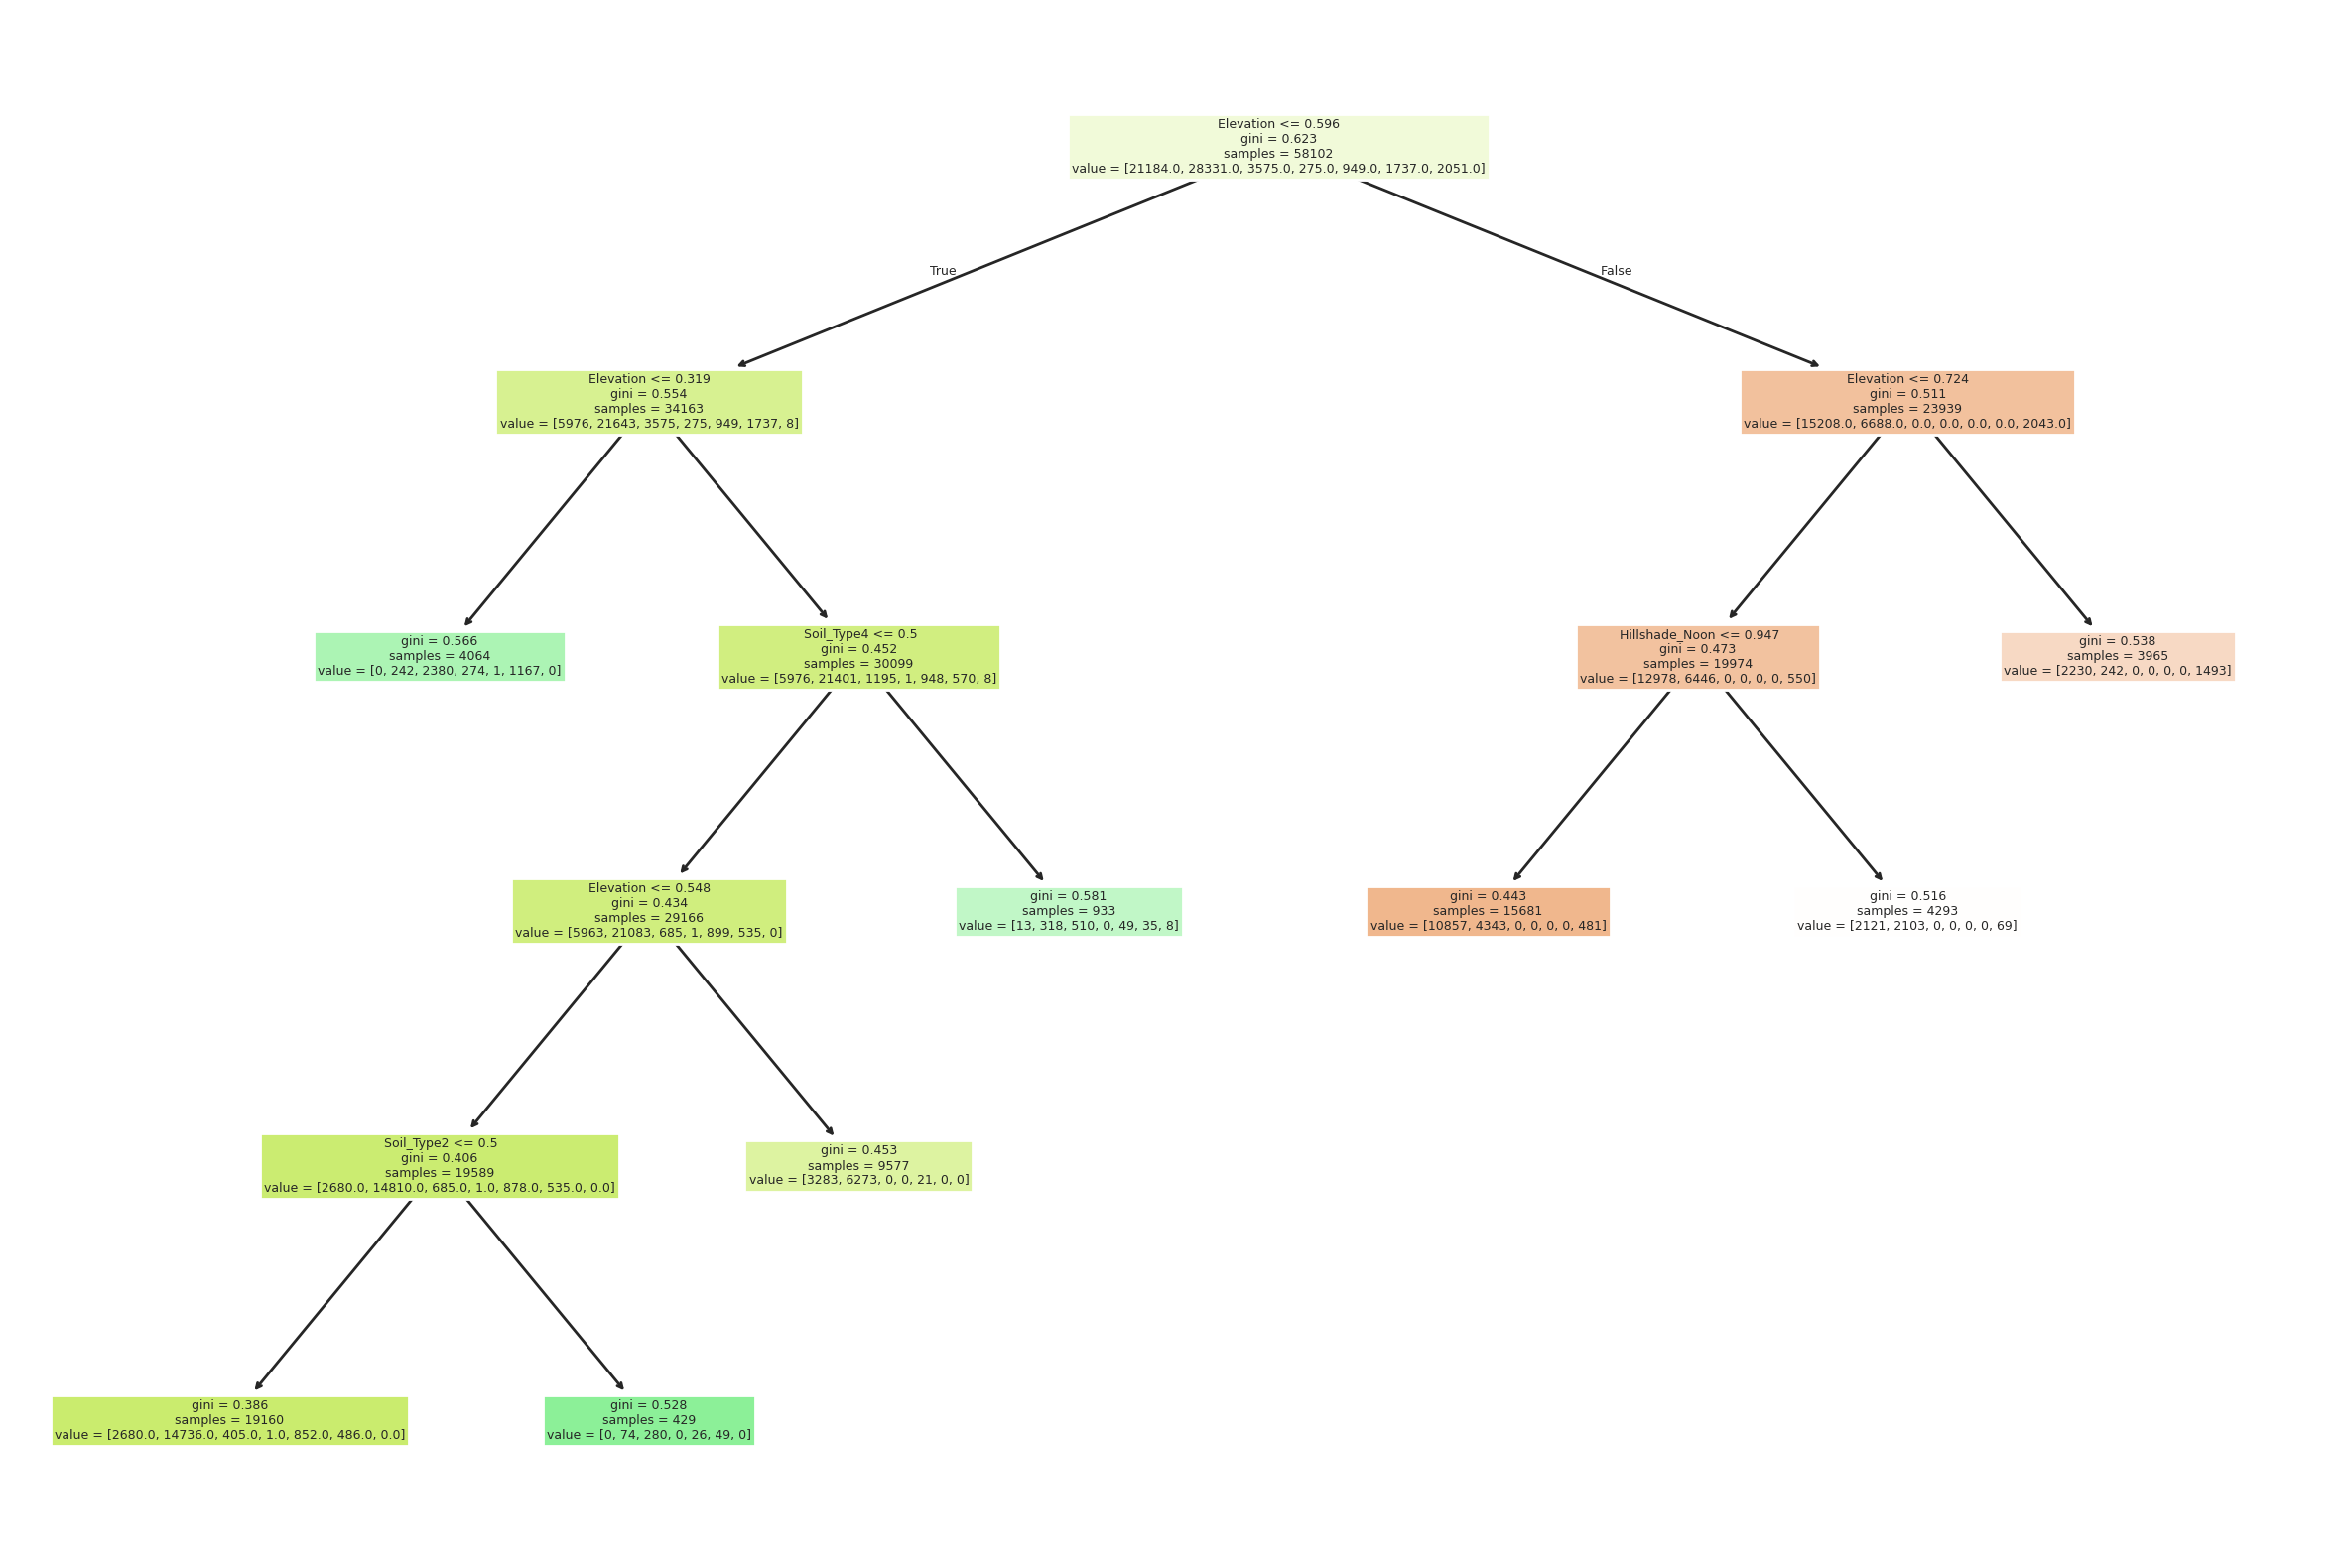

In [ ]:
# https://www.geeksforgeeks.org/machine-learning/changing-colors-for-decision-tree-plot-using-sklearn-plot-tree/
# https://www.geeksforgeeks.org/machine-learning/decision-tree-introduction-example/
# https://www.kaggle.com/code/anshtanwar/visualize-decision-trees-dtreeviz

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# train a decision tree classifier with max of 8 leaf nodes
dtree = tree.DecisionTreeClassifier(max_leaf_nodes=8, random_state=id)
dtree.fit(X_tr, y_tr)

# put the features into a list
features = list(X_tr.columns)

# make predictions based on testing dataset
y_pred = dtree.predict(X_ts)

# create and display the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dtree, filled=True, feature_names=features)
plt.show()


Each node in the graph represents a rule which splits the data based on some condition (essentially an if-statement/conditional statement). The condition could be a feature or a specific value of a feature (e.g. all forests covers with soil type 5 are class 4, or only forest cover class 4 can occur on slope above 50 degress). The colours represent the majority class at each node, and therefore the predicted class at each node.

The plot displays the GINI index at each node. The GINI index gives us an idea of how often a randomly selected datapoint at each node would be incorrectly identified (difference of 1 and the squared probability of each outcome). Therefore, a lower GINI index is desired at each node.

The range of GINI index values for the above decision tree plot is 0.386 to 0.623. This range is not ideal; GINI values closer to zero would indicate more pure nodes. A GINI index value of 0 would indicate a pure node, meaning only 1 class occurs at that node (perfect classification of that class/at that node).

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

https://www.datacamp.com/tutorial/decision-tree-classification-python

https://stats.stackexchange.com/questions/596157/meaning-of-colors-in-from-sklearn-decisiontreeclassifier

https://www.geeksforgeeks.org/machine-learning/gini-impurity-and-entropy-in-decision-tree-ml/

https://www.geeksforgeeks.org/machine-learning/decision-tree-introduction-example/

https://datascience.stackexchange.com/questions/102393/what-is-the-meaning-of-the-gini-index

https://ompramod.medium.com/decision-trees-91530198a5a5


In [ ]:
# installing the decision tree visualisation library
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.3 MB/s eta 0:00:00


In [ ]:
# decision tree visualisation library
import dtreeviz

# decrementing class labels by 1 for library requirements
y_train1 = y_tr-1
# putting the feature names into a list
fnames = list(X_tr.columns)
# create a decision tree classifier with max depth 8 and random seed = 1631625
clf = tree.DecisionTreeClassifier(max_depth=8, random_state=id)
# fit model
clf.fit(X_tr, y_train1)
# create decision tree with dtreeviz
viz = dtreeviz.model(clf, X_tr, y_train1, target_name="cover", feature_names=fnames, class_names=['0', '1', '2', '3', '4', '5', '6'])
# display graph
viz.view(fontname="monospace")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


The dtreeviz graph gives greater insight into how the data are split at each node. It also shows the distrubtion of the classes for each feature/at each node.The size of the circles at the end nodes indicate the number of examples.

###convert

In [ ]:

!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab_Notebooks/Lab2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Lab2.ipynb to pdf
[NbConvertApp] Support files will be in Lab2_files/
[NbConvertApp] Making directory ./Lab2_files
[NbConvertApp] Writing 93071 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 364609 bytes to /content/drive/MyDrive/Colab_Notebooks/Lab2.pdf
